In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/vh/n_3khj917yg2bb29pqh49sjh0000gn/T/ipykernel_94314/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Exploration of commuting trends in the SF Bay Area

Data is from the American Community Survey 2022 5-year estimate (data.census.gov)

# Data wrangling

In [54]:
commuting_raw = pd.read_csv('data/ACSST5Y2022_commuting/ACSST5Y2022.S0801-Data.csv')
economic_raw = pd.read_csv('data/ACSST5Y2022_economic/ACSST5Y2022.S1901-Data.csv')
occupation_raw = pd.read_csv('data/ACSDP5Y2022_occupation/ACSDP5Y2022.DP03-Data.csv')

/var/folders/vh/n_3khj917yg2bb29pqh49sjh0000gn/T/ipykernel_94314/3966546600.py:3: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,128,129,132,133,136,137,140,141,144,145,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,178,179,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,276,290,294,302,306,310,326,338,366,376,424,452,464,474,478,480,482,492,502) have mixed types. Specify dtype option on import or set low_memory=False.
  occupation_raw = pd.read_csv('data/A

In [4]:
commuting_raw.head()

,GEO_ID,NAME,S0801_C01_001E,S0801_C01_001M,S0801_C01_002E,S0801_C01_002M,S0801_C01_003E,S0801_C01_003M,S0801_C01_004E,S0801_C01_004M,...,S0801_C03_053M,S0801_C03_054E,S0801_C03_054M,S0801_C03_055E,S0801_C03_055M,S0801_C03_056E,S0801_C03_056M,S0801_C03_057E,S0801_C03_057M,Unnamed: 344
0,Geography,Geographic Area Name,Estimate!!Total!!Workers 16 years and over,Margin of Error!!Total!!Workers 16 years and over,Estimate!!Total!!Workers 16 years and over!!ME...,Margin of Error!!Total!!Workers 16 years and o...,Estimate!!Total!!Workers 16 years and over!!ME...,Margin of Error!!Total!!Workers 16 years and o...,Estimate!!Total!!Workers 16 years and over!!ME...,Margin of Error!!Total!!Workers 16 years and o...,...,Margin of Error!!Female!!PERCENT ALLOCATED!!Pr...,Estimate!!Female!!PERCENT ALLOCATED!!Place of ...,Margin of Error!!Female!!PERCENT ALLOCATED!!Pl...,Estimate!!Female!!PERCENT ALLOCATED!!Time of d...,Margin of Error!!Female!!PERCENT ALLOCATED!!Ti...,Estimate!!Female!!PERCENT ALLOCATED!!Travel ti...,Margin of Error!!Female!!PERCENT ALLOCATED!!Tr...,Estimate!!Female!!PERCENT ALLOCATED!!Vehicles ...,Margin of Error!!Female!!PERCENT ALLOCATED!!Ve...,NaN
1,860Z200US89010,ZCTA5 89010,191,85,69.1,21.7,69.1,21.7,0.0,17.7,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
2,860Z200US89019,ZCTA5 89019,903,277,69.9,11.2,63.9,11.1,6.0,6.8,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
3,860Z200US89060,ZCTA5 89060,3948,618,88.4,4.8,79.9,6.2,8.5,4.6,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
4,860Z200US89061,ZCTA5 89061,2074,411,82.7,8.3,70.8,10.2,11.9,7.5,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN


In [5]:
commuting_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Columns: 345 entries, GEO_ID to Unnamed: 344
dtypes: float64(1), object(344)
memory usage: 4.8+ MB


In [71]:
commuting_raw.drop(0, inplace=True) # drop first row with column names
commuting_raw.reset_index(drop=True, inplace=True)

In [77]:
commuting_raw.replace('-', '0', inplace=True)
commuting_raw.replace('N', '0', inplace=True)

In [83]:
# create new dataframe with only relevant columns
commuting = pd.DataFrame()
commuting['Zip code'] = commuting_raw['NAME'].str.replace('ZCTA5 ', '') # remove zip code prefix
commuting['Total workers'] = commuting_raw['S0801_C01_001E'].astype('int64')
commuting['Car, truck, or van'] = commuting_raw['S0801_C01_002E'].astype('float64')
commuting['Drove alone'] = commuting_raw['S0801_C01_003E'].astype('float64')
commuting['Carpooled'] = commuting_raw['S0801_C01_004E'].astype('float64')
commuting['Public transportation'] = commuting_raw['S0801_C01_009E'].astype('float64')
commuting['Walked'] = commuting_raw['S0801_C01_010E'].astype('float64')
commuting['Bicycle'] = commuting_raw['S0801_C01_011E'].astype('float64')
commuting['Taxi, motorcycle, or other'] = commuting_raw['S0801_C01_012E'].astype('float64')
commuting['Worked in county of residence'] = commuting_raw['S0801_C01_015E'].astype('float64')
commuting['Worked outside county of residence'] = commuting_raw['S0801_C01_016E'].astype('float64')
commuting['Mean travel time'] = commuting_raw['S0801_C01_046E'].astype('float64')
commuting.head()

,Zip code,Total workers,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Walked,Bicycle,"Taxi, motorcycle, or other",Worked in county of residence,Worked outside county of residence,Mean travel time
0,89010,191,69.1,69.1,0.0,0.0,5.2,0.0,0.0,92.1,2.6,20.1
1,89019,903,69.9,63.9,6.0,0.0,20.0,0.0,1.3,93.5,0.9,27.2
2,89060,3948,88.4,79.9,8.5,0.0,0.0,0.0,2.8,75.8,21.6,34.6
3,89061,2074,82.7,70.8,11.9,0.0,0.1,0.0,9.6,71.2,28.8,32.3
4,89439,751,83.4,78.0,5.3,0.0,0.0,0.0,3.6,83.8,4.3,22.9


In [55]:
economic_raw.drop(0, inplace=True) # drop first row with column names
economic_raw.reset_index(drop=True, inplace=True)

In [56]:
economic_raw.replace('-', '0', inplace=True)
economic_raw.replace('2,500-', '2500', inplace=True)
economic_raw.replace('250,000+', '250000', inplace=True)
economic_raw.replace('N', '0', inplace=True)

In [60]:
# create new dataframe with only relevant columns and convert to percentages
economic = pd.DataFrame()
economic['Zip code'] = economic_raw['NAME'].str.replace('ZCTA5 ', '') # remove zip code prefix
economic['Total households'] = economic_raw['S1901_C01_001E'].astype('int64')
economic['Less than $10,000'] = economic_raw['S1901_C01_002E'].astype('float64')
economic['$10,000 to $14,999'] = economic_raw['S1901_C01_003E'].astype('float64')
economic['$15,000 to $24,999'] = economic_raw['S1901_C01_004E'].astype('float64')
economic['$25,000 to $34,999'] = economic_raw['S1901_C01_005E'].astype('float64')
economic['$35,000 to $49,999'] = economic_raw['S1901_C01_006E'].astype('float64')
economic['$50,000 to $74,999'] = economic_raw['S1901_C01_007E'].astype('float64')
economic['$75,000 to $99,999'] = economic_raw['S1901_C01_008E'].astype('float64')
economic['$100,000 to $149,999'] = economic_raw['S1901_C01_009E'].astype('float64')
economic['$150,000 to $199,999'] = economic_raw['S1901_C01_010E'].astype('float64')
economic['$200,000 or more'] = economic_raw['S1901_C01_011E'].astype('float64')
economic['Median household income'] = economic_raw['S1901_C01_012E'].astype('float64')
economic['Mean household income'] = economic_raw['S1901_C01_013E'].astype('float64')
economic.head()

,Zip code,Total households,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Median household income,Mean household income
0,89010,188,0.0,0.0,17.6,14.9,17.6,18.6,4.3,20.7,3.2,3.2,50000.0,71095.0
1,89019,1150,0.0,4.4,24.5,11.9,6.9,8.9,17.0,8.3,13.7,4.3,51806.0,109663.0
2,89060,5129,6.7,5.0,9.8,11.3,18.6,19.2,11.6,5.6,3.6,8.7,48076.0,73949.0
3,89061,3326,2.7,1.1,7.2,8.6,15.5,24.9,12.4,21.3,4.7,1.6,64420.0,76057.0
4,89439,834,5.0,3.5,9.7,8.3,9.5,7.2,12.0,14.6,8.3,21.9,88500.0,127375.0


In [62]:
occupation_raw.drop(0, inplace=True) # drop first row with column names
occupation_raw.reset_index(drop=True, inplace=True)

In [63]:
# create new dataframe with only relevant columns
occupation = pd.DataFrame()
occupation['Zip code'] = occupation_raw['NAME'].str.replace('ZCTA5 ', '') # remove zip code prefix
occupation['Civilian employed population 16 years and over'] = occupation_raw['DP03_0026E'].astype('float64')/economic['Total households']*100
occupation['Management, business, science, and arts occupations'] = occupation_raw['DP03_0027E'].astype('float64')/economic['Total households']*100
occupation['Service occupations'] = occupation_raw['DP03_0028E'].astype('float64')/economic['Total households']*100
occupation['Sales and office occupations'] = occupation_raw['DP03_0029E'].astype('float64')/economic['Total households']*100
occupation['Natural resources, construction, and maintenance occupations'] = occupation_raw['DP03_0030E'].astype('float64')/economic['Total households']*100
occupation['Production, transportation, and material moving occupations'] = occupation_raw['DP03_0031E'].astype('float64')/economic['Total households']*100
occupation['Agriculture, forestry, fishing and hunting, and mining'] = occupation_raw['DP03_0033E'].astype('float64')/economic['Total households']*100
occupation['Construction'] = occupation_raw['DP03_0034E'].astype('float64')/economic['Total households']*100
occupation['Manufacturing'] = occupation_raw['DP03_0035E'].astype('float64')/economic['Total households']*100
occupation['Wholesale trade'] = occupation_raw['DP03_0036E'].astype('float64')/economic['Total households']*100
occupation['Retail trade'] = occupation_raw['DP03_0037E'].astype('float64')/economic['Total households']*100
occupation['Transportation and warehousing, and utilities'] = occupation_raw['DP03_0038E'].astype('float64')/economic['Total households']*100
occupation['Information'] = occupation_raw['DP03_0039E'].astype('float64')/economic['Total households']*100
occupation['Finance and insurance, and real estate and rental and leasing'] = occupation_raw['DP03_0040E'].astype('float64')/economic['Total households']*100
occupation['Professional, scientific, and management, and administrative and waste management services'] = occupation_raw['DP03_0041E'].astype('float64')/economic['Total households']*100
occupation['Educational services, and health care and social assistance'] = occupation_raw['DP03_0042E'].astype('float64')/economic['Total households']*100
occupation['Arts, entertainment, and recreation, and accommodation and food services'] = occupation_raw['DP03_0043E'].astype('float64')/economic['Total households']*100
occupation['Other services, except public administration'] = occupation_raw['DP03_0044E'].astype('float64')/economic['Total households']*100
occupation['Public administration'] = occupation_raw['DP03_0045E'].astype('float64')/economic['Total households']*100
occupation.drop(0, inplace=True) # drop first row with column names
occupation.reset_index(drop=True, inplace=True)
occupation.head()


,Zip code,Civilian employed population 16 years and over,"Management, business, science, and arts occupations",Service occupations,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations","Agriculture, forestry, fishing and hunting, and mining",Construction,Manufacturing,Wholesale trade,Retail trade,"Transportation and warehousing, and utilities",Information,"Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services","Other services, except public administration",Public administration
0,89019,78.086957,22.000000,21.217391,14.173913,8.695652,12.000000,7.478261,0.956522,5.043478,0.000000,8.521739,6.260870,1.130435,0.956522,6.086957,12.173913,18.869565,6.260870,4.347826
1,89060,76.974069,15.324625,15.246637,22.752973,12.380581,11.269253,0.662897,10.079938,5.712615,6.317021,15.012673,3.977384,0.935855,2.320140,6.024566,10.762332,11.737181,2.554104,0.877364
2,89061,63.138906,22.609741,11.725797,11.876127,7.817198,9.110042,2.405292,5.021046,0.541191,0.000000,5.622369,8.388455,0.721587,4.750451,6.945280,10.914011,9.711365,1.413109,6.704750
3,89439,95.563549,41.366906,15.827338,14.028777,18.105516,6.235012,5.035971,16.187050,0.000000,2.158273,6.954436,8.872902,0.959233,6.954436,10.191847,21.342926,7.673861,6.714628,2.517986
4,90001,177.075826,25.608590,38.236376,35.066559,21.982790,56.181511,1.014930,16.555122,26.733838,9.531514,23.424285,17.827462,0.779584,3.434581,17.481797,23.843495,19.077738,14.164889,3.206590


In [64]:
occupation.describe()

/Users/matt/anaconda3/envs/geo_env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/matt/anaconda3/envs/geo_env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/matt/anaconda3/envs/geo_env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/matt/anaconda3/envs/geo_env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/matt/anaconda3/envs/geo_env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/matt/anaconda3/envs/geo_env/lib/python

,Civilian employed population 16 years and over,"Management, business, science, and arts occupations",Service occupations,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations","Agriculture, forestry, fishing and hunting, and mining",Construction,Manufacturing,Wholesale trade,Retail trade,"Transportation and warehousing, and utilities",Information,"Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services","Other services, except public administration",Public administration
count,1759.000000,1753.000000,1753.000000,1749.000000,1744.000000,1749.000000,1738.000000,1740.000000,1737.000000,1734.000000,1748.000000,1739.000000,1739.000000,1737.000000,1745.000000,1752.000000,1753.000000,1741.000000,1745.000000
mean,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107.686266,32.414609,14.021201,17.307692,5.301432,6.120106,0.221811,4.470371,4.522613,0.893858,7.943493,3.117267,0.000000,2.824041,9.079207,18.962032,7.494951,3.342548,2.882177
50%,130.970149,50.008679,21.538821,24.593055,11.086919,11.872910,1.040820,8.302518,8.886953,2.628517,12.500834,5.713519,1.925984,6.359649,15.650981,27.151444,11.717780,5.810442,5.411063
75%,150.329951,70.301716,29.396879,31.419458,18.444577,21.172775,5.006477,12.510598,14.393679,4.233989,16.690374,9.552184,3.965256,9.488193,21.430256,33.199194,15.789984,8.074065,8.489979
max,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [92]:
acs_data = pd.merge(commuting, economic, on='Zip code').merge(occupation, on='Zip code')

In [93]:
acs_data.head()

,Zip code,Total workers,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Walked,Bicycle,"Taxi, motorcycle, or other",Worked in county of residence,...,Wholesale trade,Retail trade,"Transportation and warehousing, and utilities",Information,"Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services","Other services, except public administration",Public administration
0,89019,903,69.9,63.9,6.0,0.0,20.0,0.0,1.3,93.5,...,0.000000,8.521739,6.260870,1.130435,0.956522,6.086957,12.173913,18.869565,6.260870,4.347826
1,89060,3948,88.4,79.9,8.5,0.0,0.0,0.0,2.8,75.8,...,6.317021,15.012673,3.977384,0.935855,2.320140,6.024566,10.762332,11.737181,2.554104,0.877364
2,89061,2074,82.7,70.8,11.9,0.0,0.1,0.0,9.6,71.2,...,0.000000,5.622369,8.388455,0.721587,4.750451,6.945280,10.914011,9.711365,1.413109,6.704750
3,89439,751,83.4,78.0,5.3,0.0,0.0,0.0,3.6,83.8,...,2.158273,6.954436,8.872902,0.959233,6.954436,10.191847,21.342926,7.673861,6.714628,2.517986
4,90001,23201,81.6,68.8,12.8,8.2,1.9,0.7,3.0,95.6,...,9.531514,23.424285,17.827462,0.779584,3.434581,17.481797,23.843495,19.077738,14.164889,3.206590


In [94]:
acs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 44 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Zip code                                                                                    1807 non-null   object 
 1   Total workers                                                                               1807 non-null   int64  
 2   Car, truck, or van                                                                          1807 non-null   float64
 3   Drove alone                                                                                 1807 non-null   float64
 4   Carpooled                                                                                   1807 non-null   float64
 5   Public transportation                    

List of Bay area zip codes from

https://data.sfgov.org/-/Bay-Area-ZIP-Codes/4kz9-76pb/about_data

In [7]:
bayarea_zipcodes = pd.read_csv('data/Bay_Area_Zip_Codes_20240714.csv')

In [8]:
bayarea_zipcodes.head()

,the_geom,po_name,zip,state,area,length
0,MULTIPOLYGON (((-121.24864699999995 37.0336800...,Los Banos,93635,CA,0.144947,2.906139
1,MULTIPOLYGON (((-122.33908200000002 37.5071070...,Belmont,94002,CA,0.001518,0.255886
2,MULTIPOLYGON (((-122.45605209999997 37.6938224...,Brisbane,94005,CA,0.001338,0.224634
3,MULTIPOLYGON (((-122.41295289999994 37.5783512...,Burlingame,94010,CA,0.003408,0.474228
4,MULTIPOLYGON (((-122.47216299999991 37.7031140...,Daly City,94014,CA,0.001567,0.275590


In [96]:
bayarea_zipcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   the_geom  323 non-null    object 
 1   po_name   323 non-null    object 
 2   zip       323 non-null    int64  
 3   state     323 non-null    object 
 4   area      323 non-null    float64
 5   length    323 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 15.3+ KB


In [89]:
len(acs_data['Zip code'].unique())

1807

In [91]:
len(bayarea_zipcodes['zip'].unique())

323

In [101]:
# create new dataframe with only bay area zip codes and data
ba_data = pd.DataFrame()
ba_data['Zip code'] = bayarea_zipcodes['zip'].astype('str')
ba_data['PO name'] = bayarea_zipcodes['po_name']
ba_data['Area'] = bayarea_zipcodes['area']
ba_data = ba_data.merge(acs_data, on='Zip code')
ba_data['Density'] = ba_data['Total households']/ba_data['Area']    # create new feature "Density"

In [102]:
ba_data.head()

,Zip code,PO name,Area,Total workers,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Walked,Bicycle,...,Retail trade,"Transportation and warehousing, and utilities",Information,"Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services","Other services, except public administration",Public administration,Density
0,93635,Los Banos,0.144947,16940,90.7,73.8,16.9,0.2,2.3,0.3,...,19.492565,8.255404,1.510041,2.291890,12.302621,20.872298,10.271348,7.128622,3.978231,9.000556e+04
1,94002,Belmont,0.001518,14315,62.4,57.3,5.1,5.7,2.3,0.6,...,9.729132,4.357840,9.461950,8.301087,39.552239,25.216510,8.411645,4.606597,3.758983,7.149583e+06
2,94005,Brisbane,0.001338,2325,71.4,61.6,9.8,7.0,0.0,0.6,...,9.411146,5.362776,1.524711,8.517350,31.808623,24.237645,9.516299,9.358570,5.678233,1.421559e+06
3,94010,Burlingame,0.003408,21855,64.0,59.4,4.6,8.0,3.2,0.4,...,9.663970,5.967642,6.098320,15.357810,33.515868,25.015557,12.532670,4.953329,4.044804,4.715405e+06
4,94014,Daly City,0.001567,25166,66.7,53.9,12.8,17.7,3.4,0.0,...,17.717996,14.813758,3.125446,9.255031,22.498930,44.669616,21.400029,10.432425,6.407878,8.943873e+06


In [112]:
ba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 47 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Zip code                                                                                    319 non-null    object 
 1   PO name                                                                                     319 non-null    object 
 2   Area                                                                                        319 non-null    float64
 3   Total workers                                                                               319 non-null    int64  
 4   Car, truck, or van                                                                          319 non-null    float64
 5   Drove alone                                

In [100]:
len(ba_data['Zip code'].unique())

319

# Exploratory data analysis

ValueError: supplied range of [0.0, inf] is not finite

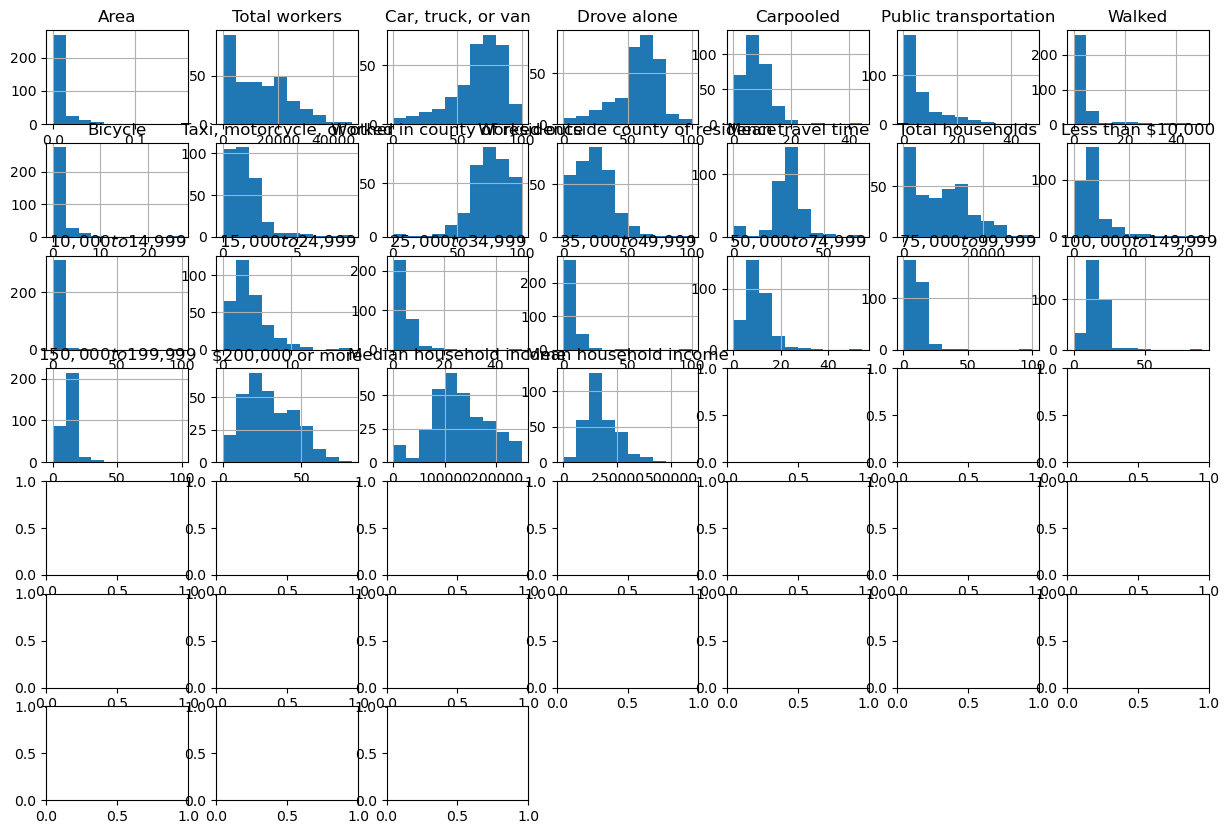

In [111]:
ba_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

<Axes: >

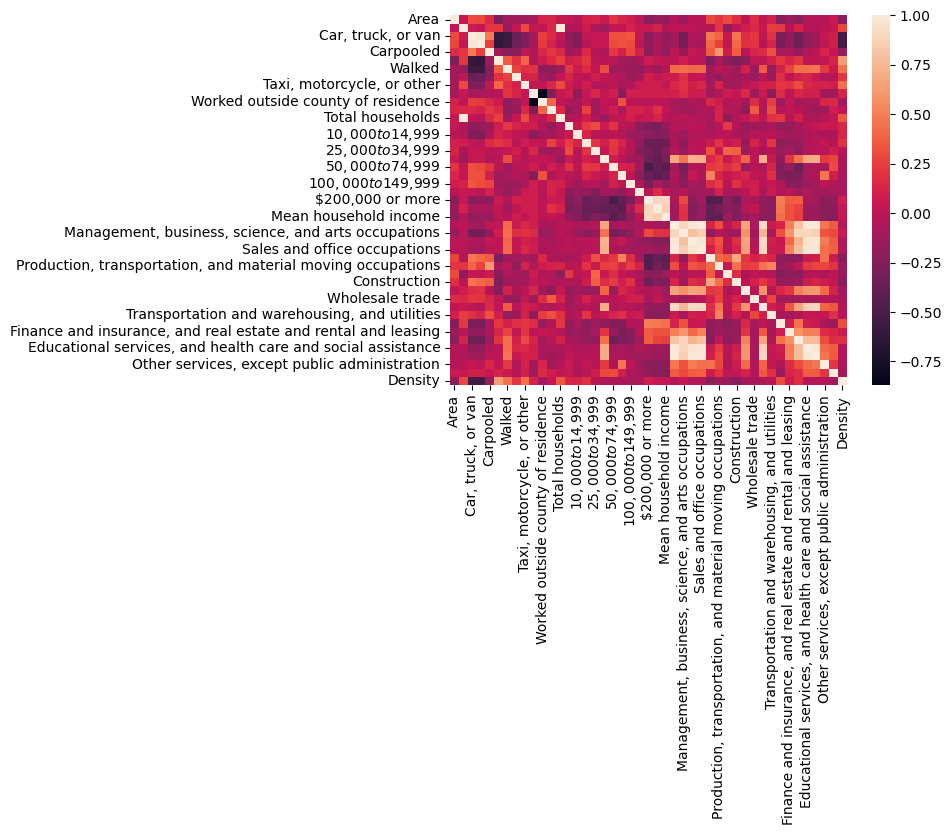

In [109]:
sns.heatmap(ba_data.drop(columns=['Zip code', 'PO name']).corr())

In [ ]:
sns.heatmap(ba_data.drop(columns=['Zip code', 'PO name']).corr())

<Axes: xlabel='Density', ylabel='Mean travel time'>

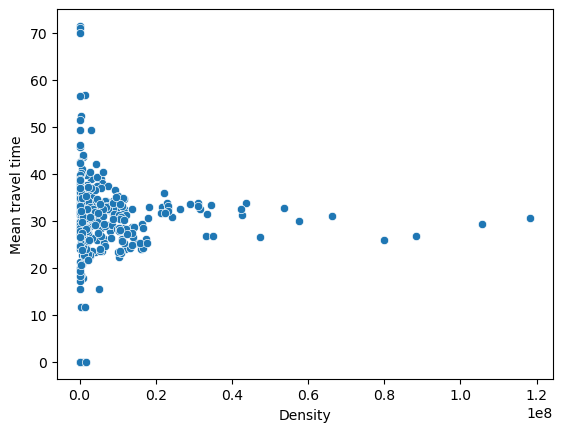

In [118]:
sns.scatterplot(data=ba_data, x='Density', y='Mean travel time')

<Axes: xlabel='Median household income', ylabel='Mean travel time'>

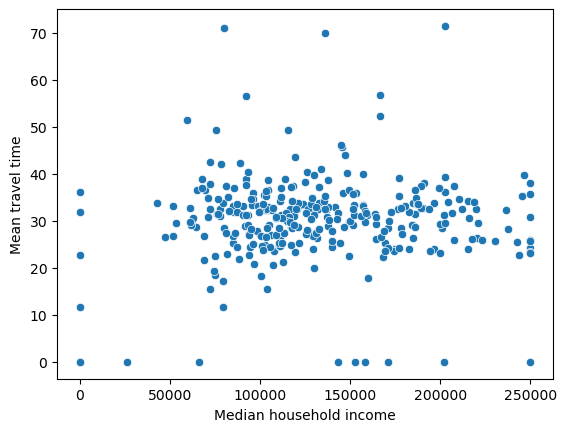

In [119]:
sns.scatterplot(data=ba_data, x='Median household income', y='Mean travel time')

<Axes: xlabel='Median household income', ylabel='Car, truck, or van'>

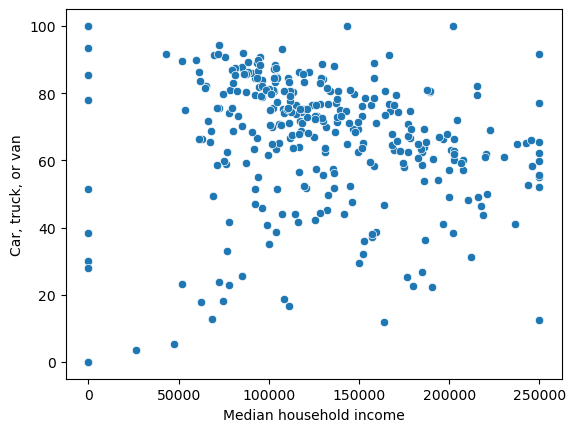

In [120]:
sns.scatterplot(data=ba_data, x='Median household income', y='Car, truck, or van')

<Axes: xlabel='Median household income', ylabel='Public transportation'>

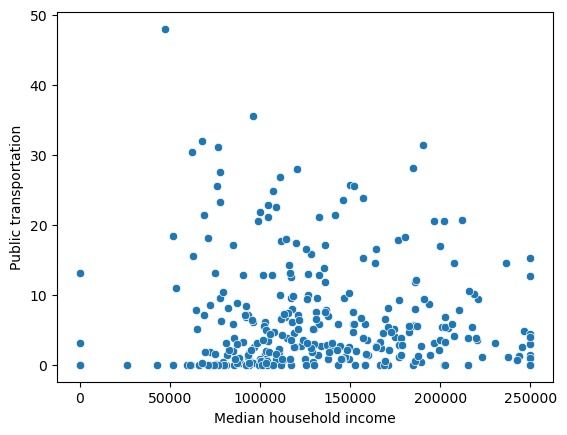

In [121]:
sns.scatterplot(data=ba_data, x='Median household income', y='Public transportation')

<Axes: xlabel='Median household income', ylabel='Walked'>

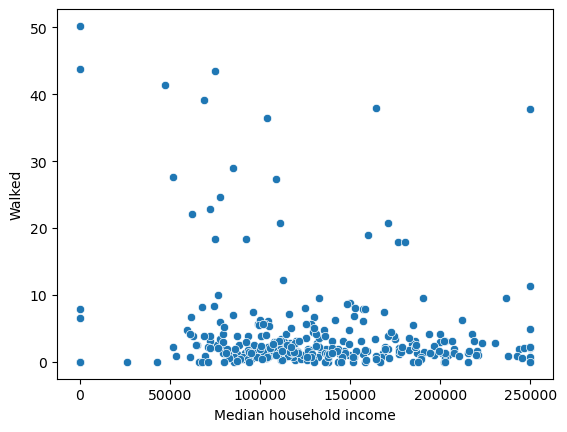

In [122]:
sns.scatterplot(data=ba_data, x='Median household income', y='Walked')

<Axes: xlabel='Median household income', ylabel='Bicycle'>

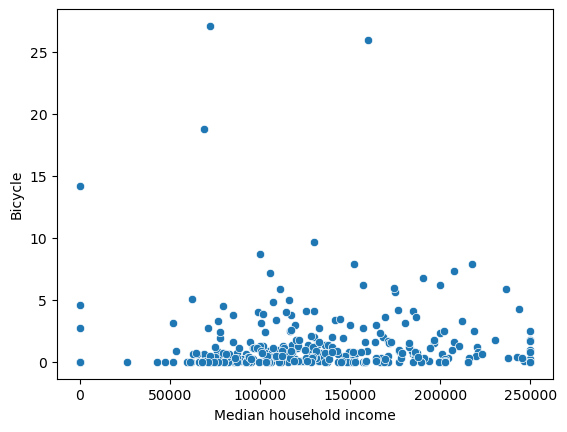

In [125]:
sns.scatterplot(data=ba_data, x='Median household income', y='Bicycle')

<Axes: xlabel='Median household income', ylabel='Carpooled'>

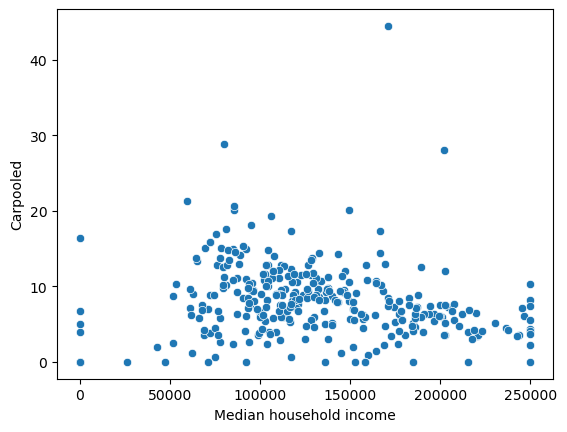

In [126]:
sns.scatterplot(data=ba_data, x='Median household income', y='Carpooled')

<Axes: xlabel='Density', ylabel='Walked'>

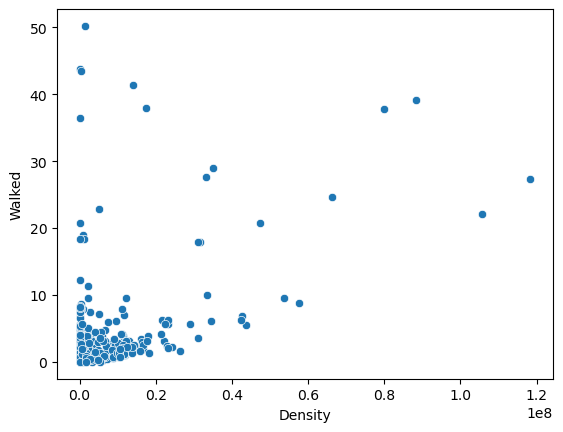

In [123]:
sns.scatterplot(data=ba_data, x='Density', y='Walked')

<Axes: xlabel='Density', ylabel='Public transportation'>

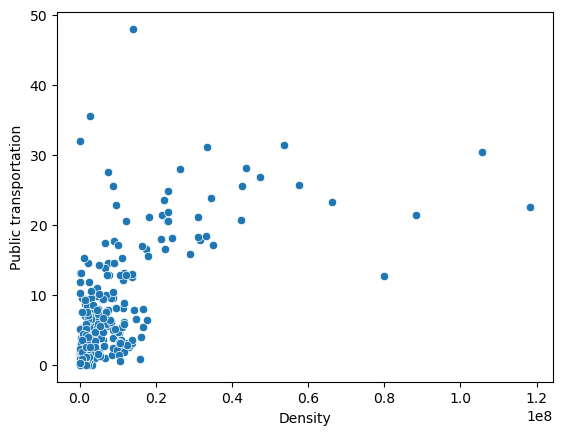

In [124]:
sns.scatterplot(data=ba_data, x='Density', y='Public transportation')

<Axes: xlabel='Density', ylabel='Bicycle'>

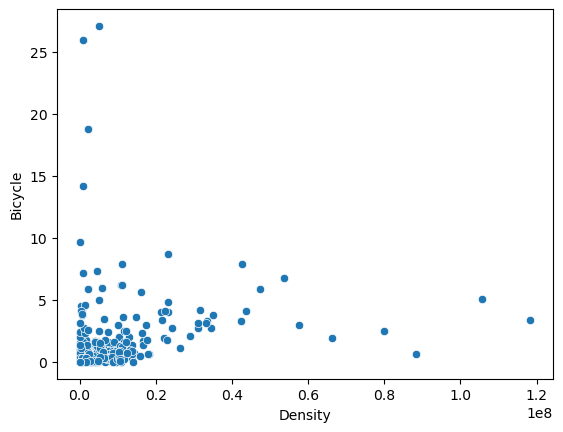

In [128]:
sns.scatterplot(data=ba_data, x='Density', y='Bicycle')

<Axes: xlabel='Worked outside county of residence', ylabel='Mean travel time'>

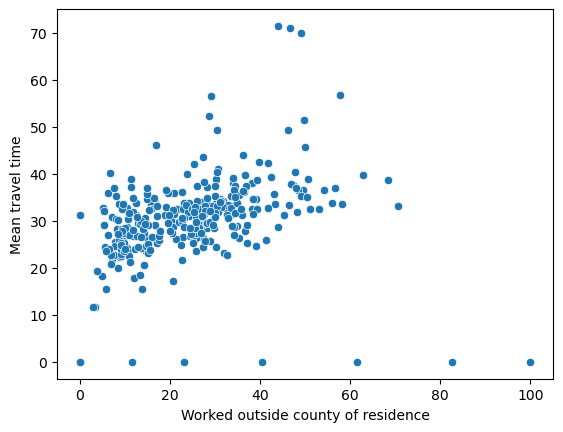

In [129]:
sns.scatterplot(data=ba_data, x='Worked outside county of residence', y='Mean travel time')